# finance

### 삼성전자 종가 Series 로 생성하기

In [1]:
import pandas as pd

'''
read_csv() 함수의 parameter

path : 경로
index_col : index 로 사용할 컬럼번호나 이름
header : 컬럼 이름으로 사용할 row 의 번호 - 기본값은 0 임
squeeze : row 하나인 경우 Series 를 반환함 - 기본값은 False 임
'''

# FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. 
sscp_sr = pd.read_csv('../dataset/삼성전자 종가.csv', 
                   index_col=0, 
                   squeeze=True,
                   header=0)
sscp_sr.head(1)

/var/folders/d3/j8xh77fn6cddqhxzg5jmq0r00000gn/T/ipykernel_78134/3769249516.py:13: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sscp_sr = pd.read_csv('../dataset/삼성전자 종가.csv',


Date
2018-01-02    51020
Name: Close, dtype: int64

In [2]:
# read_csv() 함수를 실행할 때 squeeze parameter를 True로 지정하면
# DataFrame 객체가 아니고 Series 객체가 생성됨
# Date 는 index 가 되고 Close 만 data 로 사용하게 됨
sscp_sr.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)

In [3]:
# loc[index 명] <-- 실제 data를 반환 함 : close price
sscp_sr.loc['2021-12-07']

77400

In [4]:
# iloc[index 번호]
# 100 번째 data 값 알아보기
sscp_sr.iloc[100]

49500

### Series 에 행 추가하기

In [5]:
# sscp_sr 에 있는 data 의 개수 : shape
sscp_sr.shape

(977,)

In [6]:
# 없는 index 이름을 지정해서 값을 할당하면 행이 추가 됨
sscp_sr.loc['2021-12-24'] = 98200
sscp_sr.tail()

Date
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
2021-12-24    98200
Name: Close, dtype: int64

In [7]:
sscp_sr.describe()

count      978.000000
mean     57337.678937
std      14137.826336
min      37450.000000
25%      46300.000000
50%      51300.000000
75%      70200.000000
max      98200.000000
Name: Close, dtype: float64

## Series 연결하기

In [8]:
sscp1_sr = pd.read_excel('../dataset/samsung_excel.xlsx',
                         sheet_name='Sheet1',
                         index_col=0,
                         squeeze=True)
sscp1_sr.head()

/var/folders/d3/j8xh77fn6cddqhxzg5jmq0r00000gn/T/ipykernel_78134/4122928954.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sscp1_sr = pd.read_excel('../dataset/samsung_excel.xlsx',


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
Name: Close, dtype: int64

In [9]:
sscp2_sr = pd.read_excel('../dataset/samsung_excel.xlsx',
                         sheet_name='Sheet2',
                         index_col=0,
                         squeeze=True)
sscp2_sr.head()

/var/folders/d3/j8xh77fn6cddqhxzg5jmq0r00000gn/T/ipykernel_78134/2684846304.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sscp2_sr = pd.read_excel('../dataset/samsung_excel.xlsx',


Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
Name: Close, dtype: int64

In [10]:
# ignore_index : False - 기본값
# ignore_index : True - sscp3_sr 의 index 0, 1, 2, ... 로 지정 됨

sscp3_sr = sscp1_sr.append(sscp2_sr, ignore_index=False)
sscp3_sr.head()

/var/folders/d3/j8xh77fn6cddqhxzg5jmq0r00000gn/T/ipykernel_78134/4000045348.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sscp3_sr = sscp1_sr.append(sscp2_sr, ignore_index=False)


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
Name: Close, dtype: int64

In [11]:
sscp3_sr.describe()

count      982.000000
mean     57406.364562
std      14133.501208
min      37450.000000
25%      46300.000000
50%      51380.000000
75%      70400.000000
max      91000.000000
Name: Close, dtype: float64

In [12]:
desc = sscp3_sr.describe()

print('count :', desc['count'])
print('mean :', desc['mean'])
print('std :', desc['std'])
print('min :', desc['min'])
print('25% :', desc['25%'])
print('50% :', desc['50%'])
print('75% :', desc['75%'])
print('max :', desc['max'])

count : 982.0
mean : 57406.36456211813
std : 14133.501207873187
min : 37450.0
25% : 46300.0
50% : 51380.0
75% : 70400.0
max : 91000.0


### 삼성전자의 고점과 저점

In [13]:
print('max :', sscp_sr.max())
print(sscp_sr.index[sscp_sr.values == sscp_sr.max()])
print(sscp_sr.index[sscp_sr.argmax()])
print(sscp_sr.iloc[sscp_sr.argmax()])

max : 98200
Index(['2021-12-24'], dtype='object', name='Date')
2021-12-24
98200


In [14]:
print('min :', sscp_sr.min())
print(sscp_sr.index[sscp_sr.values == sscp_sr.min()])
print(sscp_sr.index[sscp_sr.argmin()])
print(sscp_sr.iloc[sscp_sr.argmin()])

min : 37450
Index(['2019-01-04'], dtype='object', name='Date')
2019-01-04
37450


### 삼성전자의 수익률

In [15]:
sscp_sr.shift(1)

Date
2018-01-02        NaN
2018-01-03    51020.0
2018-01-04    51620.0
2018-01-05    51080.0
2018-01-08    52120.0
               ...   
2021-12-14    76800.0
2021-12-15    77000.0
2021-12-16    77600.0
2021-12-17    77800.0
2021-12-24    78000.0
Name: Close, Length: 978, dtype: float64

In [16]:
sscp_sr - sscp_sr.shift(1)

Date
2018-01-02        NaN
2018-01-03      600.0
2018-01-04     -540.0
2018-01-05     1040.0
2018-01-08     -100.0
               ...   
2021-12-14      200.0
2021-12-15      600.0
2021-12-16      200.0
2021-12-17      200.0
2021-12-24    20200.0
Name: Close, Length: 978, dtype: float64

In [17]:
return_value = (sscp_sr - sscp_sr.shift(1)) / sscp_sr.shift(1)
return_value

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
2021-12-24    0.258974
Name: Close, Length: 978, dtype: float64

In [18]:
return_value.max()

0.258974358974359

In [19]:
# 수익률이 제일 좋았던 날짜
return_value.index[return_value.argmax()]

'2021-12-24'

### NaN (Not a Number) 값 삭제하기 - dropna() 메소드 사용

In [20]:
return_value = (sscp_sr - sscp_sr.shift(1)) / sscp_sr.shift(1)
return_value.head()

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
Name: Close, dtype: float64

In [21]:
# 데이터 전처리 : 결측치 삭제하기
return_value.dropna().head()

Date
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
2018-01-09   -0.031142
Name: Close, dtype: float64

In [22]:
# 결측치 0으로 치환하기
return_value = (sscp_sr - sscp_sr.shift(1)) / sscp_sr.shift(1)
return_value.fillna(0).head()

Date
2018-01-02    0.000000
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
Name: Close, dtype: float64

In [23]:
return_value.sort_values(ascending=True).head()

Date
2020-03-23   -0.063877
2020-03-19   -0.058114
2018-10-11   -0.048565
2020-06-15   -0.045889
2020-03-11   -0.045788
Name: Close, dtype: float64

In [24]:
return_value.sort_index(ascending=True).head()

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
Name: Close, dtype: float64

In [25]:
return_value[return_value.values >= 0.04].head()

Date
2018-03-06    0.040265
2018-09-14    0.040863
2018-11-02    0.047450
2019-03-21    0.040863
2020-03-20    0.057043
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

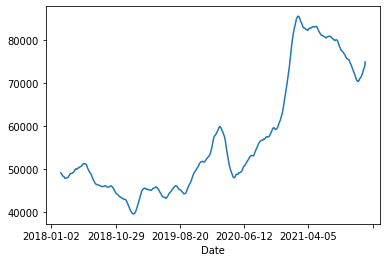

In [26]:
sscp_sr.rolling(window=30).mean().plot()